## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()

**What is the no. of elements in the training and testing datasets?**

In [ ]:
#ENTER YOUR CODE HERE
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
print(num_train_samples)
print(num_test_samples)


60000
10000


**What are the labels in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE
print(y_train)
print(y_test)


[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
import numpy as np

**Visualise one image for each label.**

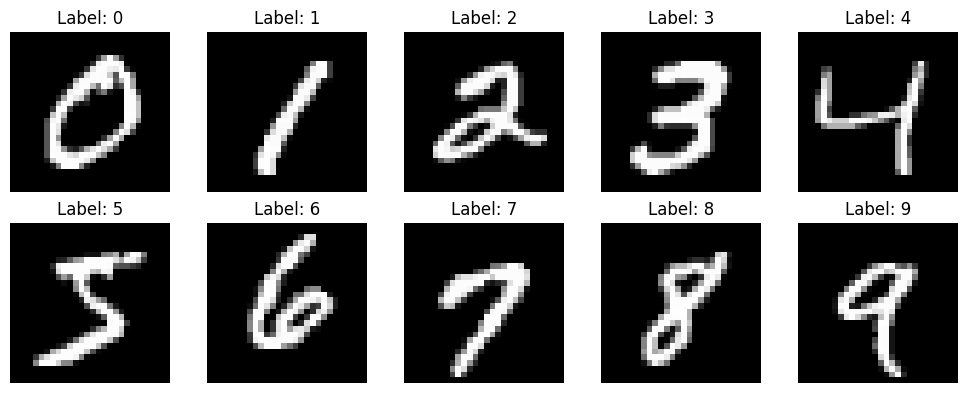

In [ ]:
#ENTER YOUR CODE HERE
plt.figure(figsize=(10,4))
for i in range(10):
  idx = np.where(y_train == i)[0][0]
  img = x_train[idx]

  plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(f'Label: {i}')
  plt.axis('off')
plt.tight_layout()
plt.show()

**One-hot encode the y labels.**

In [ ]:
#ENTER YOUR CODE HERE
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

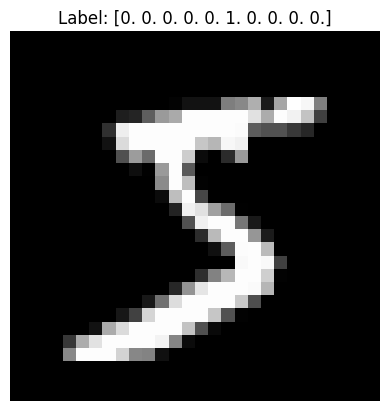

In [ ]:
#ENTER YOUR CODE HERE
image_arr = x_train[0]
label=y_train[0]
print(image_arr)
plt.imshow(image_arr, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [ ]:
#ENTER YOUR CODE HERE
np.expand_dims(x_train, axis=-1)
np.expand_dims(x_test, axis=-1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [ ]:
#ENTER YOUR CODE HERE
x_train= x_train /255.0
x_train= x_test /255.0

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [ ]:
model = tf.keras.models.Sequential()

# ENTER YOUR CODE HERE
from tensorflow.keras import layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [ ]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (10000, 28, 28)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000, 10)


**Fit the model and plot the training history.**

In [ ]:
#ENTER YOUR CODE HERE
history=model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.figure(figsize=(12, 4))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.1008 - loss: 2.3082 - val_accuracy: 0.1105 - val_loss: 2.3013
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1052 - loss: 2.3016 - val_accuracy: 0.1105 - val_loss: 2.3000
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.1177 - loss: 2.2981 - val_accuracy: 0.1075 - val_loss: 2.3015
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.1197 - loss: 2.3002 - val_accuracy: 0.1130 - val_loss: 2.3005
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.1185 - loss: 2.2977 - val_accuracy: 0.1075 - val_loss: 2.3039
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.1221 - loss: 2.2932 - val_accuracy: 0.1085 - val_loss: 2.3024
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.1284 - loss: 2.2877 - val_accuracy: 0.1110 - val_loss: 2.3023
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.1436 - loss: 2.2835 - val_accuracy: 0.11

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (10000, 28, 28)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000, 10)


**Now test your model on the training dataset and print the classification matrix.**

In [ ]:
 from sklearn.metrics import classification_report
# y_test_indices = y_test.argmax(axis=1)
# y_pred_indices = model.predict(x_test).argmax(axis=1)

# print(classification_report(y_test, model.predict(x_test).argmax(axis=1)))
# from sklearn.metrics import classification_report

# Convert one-hot encoded y_test to class indices
y_test_indices = y_test.argmax(axis=1)

# Predict the classes
y_pred_indices = model.predict(x_test).argmax(axis=1)

# Print the classification report using class indices
print(classification_report(y_test_indices, y_pred_indices))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       0.10      0.12      0.11       980
           1       0.01      0.00      0.00      1135
           2       0.01      0.00      0.00      1032
           3       0.10      0.19      0.13      1010
           4       0.25      0.29      0.27       982
           5       0.10      0.02      0.04       892
           6       0.05      0.08      0.06       958
           7       0.15      0.44      0.23      1028
           8       0.06      0.02      0.03       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.12     10000
   macro avg       0.08      0.12      0.09     10000
weighted avg       0.08      0.12      0.09     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


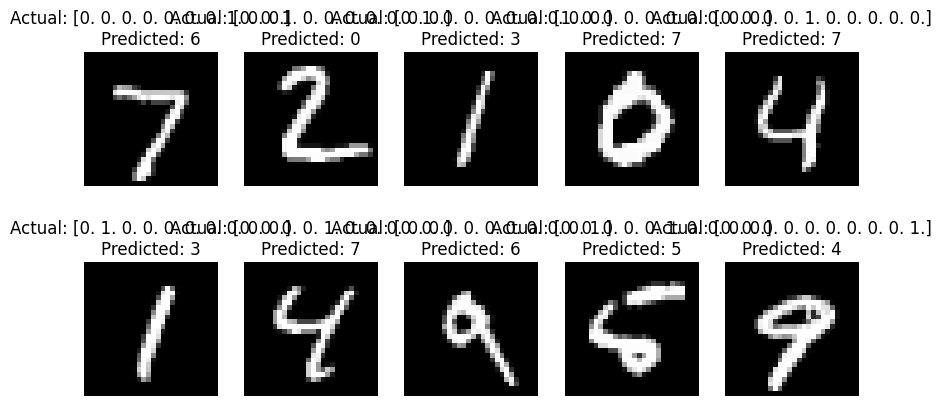

In [ ]:
rows = 2
columns = 5

y_pred = model.predict(x_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(x_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

**Output of the max pooling layer.**